In [56]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [57]:
# Load Dataset
df= pd.read_csv(r'C:\Users\TanPhat\Documents\DATA SCIENCE\ml_project\notebook\data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
# Preparing X and y variables
X = df.drop(columns='math_score',axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [59]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [60]:
# Create Column Transformer with 3 type of transformers
num_feature = X.select_dtypes(exclude='O').columns
cat_feature = X.select_dtypes(include='O').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_feature),
        ('StandardScaler',numeric_transformer,num_feature)
    ]
)

In [61]:
X = preprocessor.fit_transform(X)

In [62]:
X.shape

(1000, 19)

In [63]:
# Seperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [64]:
print("Category in 'gender' variable:",end=" ")
print(df['gender'].unique())
print("Category in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())
print("Category in 'parental_level_of_education' variable:",end=" ")
print(df['parental_level_of_education'].unique())
print("Category in 'lunch' variable:",end=" ")
print(df['lunch'].unique())
print("Category in 'test_preparation_course' variable:",end=" ")
print(df['test_preparation_course'].unique())

Category in 'gender' variable: ['female' 'male']
Category in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Category in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in 'lunch' variable: ['standard' 'free/reduced']
Category in 'test_preparation_course' variable: ['none' 'completed']


In [65]:
# Create an Evalute Function to give all metrics after model Training
def evaluate_model (true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return rmse,mae ,r2_square

In [69]:
models ={'LinearRegression':LinearRegression(),
         'Ridge':Ridge(),
         'Lasso':Lasso(),
         'KNeighborsRegressor':KNeighborsRegressor(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'XGBRegressor':XGBRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor()
         }
model_list = []
rmse_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    model_train_rmse ,model_train_mae , model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_rmse ,model_test_mae , model_test_r2 = evaluate_model(y_test,y_test_pred)

    rmse_list.append(model_test_rmse)
    r2_list.append(model_test_r2)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance in Traning Set')
    print('Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('R2_Score: {:.4f}'.format(model_train_r2))

    print('Model Performance in Test Set')
    print('Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('R2_Score: {:.4f}'.format(model_test_r2))
    print('**********************************')





LinearRegression
Model Performance in Traning Set
Root Mean Squared Error: 5.3231
Mean Absolute Error: 4.2667
R2_Score: 0.8743
Model Performance in Test Set
Root Mean Squared Error: 5.3940
Mean Absolute Error: 4.2148
R2_Score: 0.8804
**********************************
Ridge
Model Performance in Traning Set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R2_Score: 0.8743
Model Performance in Test Set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2_Score: 0.8806
**********************************
Lasso
Model Performance in Traning Set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2_Score: 0.8071
Model Performance in Test Set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2_Score: 0.8253
**********************************
KNeighborsRegressor
Model Performance in Traning Set
Root Mean Squared Error: 5.7093
Mean Absolute Error: 4.5175
R2_Score: 0.8554
Model Performance in Test Set
Root Mean Squared Error: 7.2583
Mean Absolute Error: 5.

In [70]:
pd.DataFrame(list(zip(model_list,r2_list,rmse_list)),columns=['model name','r2 score','rmse_list']).sort_values(by=['r2 score'],ascending=False)

,model name,r2 score,rmse_list
1,Ridge,0.880593,5.390387
0,LinearRegression,0.880433,5.393994
5,RandomForestRegressor,0.851538,6.010534
7,AdaBoostRegressor,0.842943,6.182071
6,XGBRegressor,0.827797,6.473307
2,Lasso,0.825320,6.519695
3,KNeighborsRegressor,0.783497,7.258333
4,DecisionTreeRegressor,0.756204,7.702272


In [72]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy of the model is: {:.2f}".format(score))

Accuracy of the model is: 0.88


### Plot y prediction and y test

Text(0, 0.5, 'Predicted')

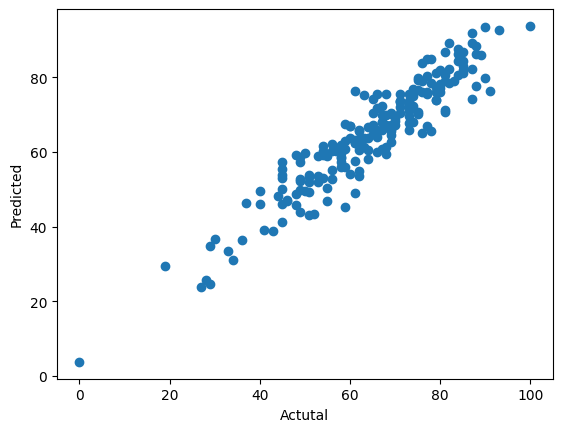

In [74]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actutal')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

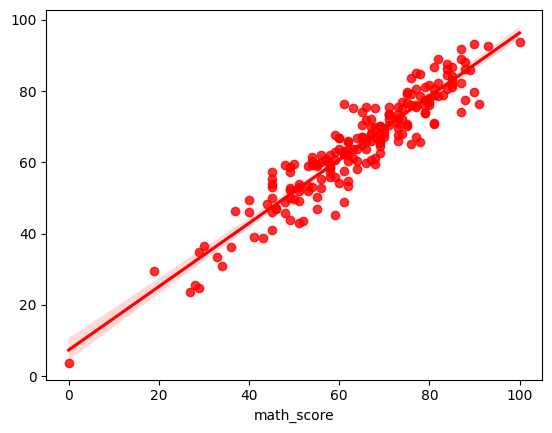

In [75]:
sns.regplot(x=y_test,y=y_pred,color='red')

In [76]:
pd.DataFrame({'Actutal values':y_test,'Predicted values':y_pred,'Different':y_test-y_pred})

,Actutal values,Predicted values,Different
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
